### Experiment Description

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

--write answer here--  

The __independent variable__ is the __words condition__, which may be either _congruent_ (the color of the words matches the word) or _incongruent_ (the color of the word doesn't match the word).  

The __dependent variable__ is the __reading time__ - the time it takes the participants to name the ink colors in a list of words of a specific words condition (the lists are of the same sizes for congruent and incongruent words condition).  


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

--write answer here--



__The null hypothesis__: there is no difference on average between the time an individual spends reading a list of words with congruent word condition and reading a list of words with incongruent words condition - i.e. between the lists where the ink colors and the words match and the lists of words where the ink colors and the words do not match.

__The alternative hypothesis__: there is a significant difference on average between the time an individual spends reading a list of words with congruent words condition and reading a list of words with incongruent words condition - i.e. between the lists where the ink colors and the words match and the lists of words where the ink colors and the words do not match.

$H_{0}$: $\mu_{diff}$ = 0  
$H_{1}$: $\mu_{diff}$ <> 0 

The sample size of the data avilable is relatively small (less than 30) and we have no information about the population (including the variance/standart deviation of reading time for each condition in it or of difference between two condition), but we expect the data to be normally distributed. The reading time for _congruent_ and _incongruent_ words conditions cannot be considered truly independent, since the individual characteristics of the participants may interfere with their results for each condition, but we can test whether the differences for each individual is on average equal to zero or not. This makes the paired t-test the most appropriate for hypothesis testing in this case, with Type I error rate of 5% (i.e. with the confidence level of 0.05).

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here

In [3]:
# imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
#loading data
df = pd.read_csv('stroopdata.csv')
df.sample(5)

,Congruent,Incongruent
2,9.564,21.214
3,8.630,15.687
21,14.233,17.960
10,22.328,24.524
7,8.987,17.394


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [6]:
summary = df.describe()
print('Congruent range:', summary.iloc[7, 0] - summary.iloc[3, 0])
print('Incongruent rang:', summary.iloc[7, 1] - summary.iloc[3, 1])

Congruent range: 13.698
Incongruent rang: 19.568


--write answer here--

There are 24 rows in the dataset, representing each participant, and 2 variables, representing the words condition. For _congruent_ words condition the mean reading time is 14.05 seconds with the standard deviation of 3.56 seconds. For _incongruent_ words condition the mean reading time is 22.02 seconds with the standard deviation of 4.8 seconds. The spread of _incongruent_ distribution is greater than of _congruent_ distribution and it lies further to the right.

To explore the difference each induvidual demonstrated in reading time between _congruent_ and _incongruent_ words conditions, another column should be added to the dataframe.

In [8]:
df['Difference'] = df.Incongruent - df.Congruent
df.Difference.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Difference, dtype: float64

As we can see from the summary above, even the minimum difference observed in the data is greater, than 0, that is the zero is not in the range of the difference distribution. The average difference between "congruent reading time" and "incongruent reading time" is about 8 seconds with the standard deviation of 4.86 seconds.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [9]:
# Build the visualizations here

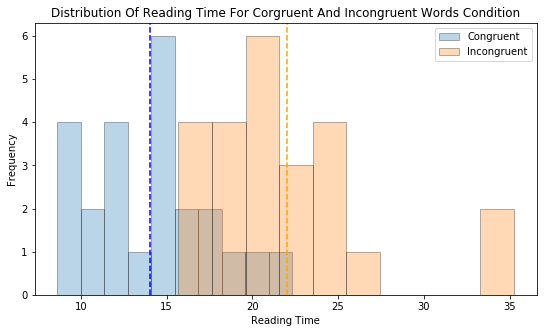

In [10]:
col_names = df.columns.values.tolist()[:-1]

plt.figure(figsize = (9, 5))

for var in col_names:
        plt.hist(df[var], edgecolor='black', alpha=0.3, label=var)

# plotting mean of reading time for congruent condition
plt.axvline(df.Congruent.mean(), color = 'blue', linestyle = '--')

# plotting mean of reading time for incongruent condition
plt.axvline(df.Incongruent.mean(), color = 'orange', linestyle = '--')

plt.legend(loc='upper right')
plt.title('Distribution Of Reading Time For Corgruent And Incongruent Words Condition')
plt.xlabel('Reading Time')
plt.ylabel('Frequency')
plt.show()

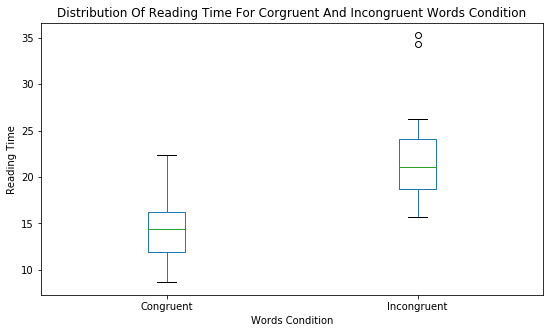

In [11]:
p = df[['Congruent', 'Incongruent']].plot(kind = 'box', 
            title ='Distribution Of Reading Time For Corgruent And Incongruent Words Condition',
            figsize = (9, 5))
p.set(xlabel = 'Words Condition', ylabel = 'Reading Time');

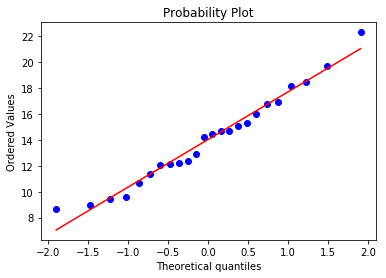

In [18]:
stats.probplot(df.Congruent, plot = plt);

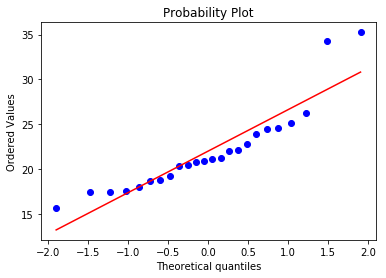

In [19]:
stats.probplot(df.Incongruent, plot = plt);

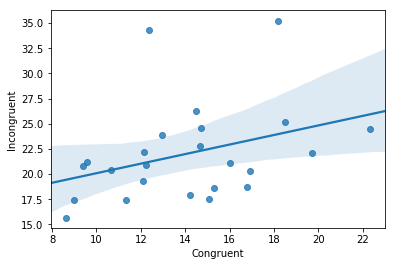

In [12]:
# checking for relationship between congruent and incongruent variables
sns.regplot(df.Congruent, df.Incongruent);

In [13]:
np.corrcoef(df.Congruent, df.Incongruent)

array([[ 1.        ,  0.35181953],
       [ 0.35181953,  1.        ]])

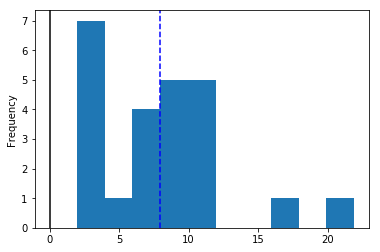

In [14]:
p = df.Difference.plot(kind = 'hist')

# plotting mean difference
p.axvline(df.Difference.mean(), color = 'blue', linestyle = '--')

# plotting zero
p.axvline(0, color = 'black');

--write answer here--

If we compare the histograms of the reading time for _congruent_ and _incongruent_ variables, we'll see the same picture we described using summary statistics. The distribution of values of _congruent_ variable is close to normal. There are more deviations in the distibution of _incongruent_ variable, but this may be attributed to the small sample size. 
Hoever, since we have paired observations, we can't compare the distributions as is - we should expect the characteristics of each individual to possibly influence their performance in both tests. We also saw that the scatterplot and the correlation coefficient show week-to-moderate relationship between congruent and incongruent reading time.   
Taking this into account together with the fact that we have a relatively small sample of 24 observation from the population which variance is unknown, the reasonable option for the hypothesis testing will be the paired t-test with 23 degrees of freedom. Until the test is conducted, from the visualisation of the distribution of the reading time differences we may suppose that it is rather unlikely for the average difference to be equal to zero. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [15]:
# Perform the statistical test here

In [16]:
# computing p_value for two-tailed hypothesis on the mean of differences
t_stat, p_value = stats.ttest_1samp(df.Difference, 0)
p_value

4.1030005857111781e-08

The same result could be achieved in Python through direct application of `scipy.stats.ttest_rel()` function to the initial dataframe (which would also save a lot of time typing but hide the methodology).

In [17]:
# computing p_value for two paired arrays of observation and two-tailed hypothesis 
t_stat, p_value = stats.ttest_rel(df.Congruent, df.Incongruent)
p_value

4.1030005857111781e-08

--write answer here--

Since the observed p-value is so close to zero, the confidence level for this hypothesis may be not only 0.05, but 0.01. Therefor, it is highly unlikely to obtain such results assuming that there is no difference in time spent by an individual on reading a list where the ink colors and the words match and on a list of words where the ink colors and the words do not match. This means that we have statistical evidence to reject the null hypothesis in favor of the alternative, stating that the difference exists. This also corresponds to the expectations we stated after in the visualisation section.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--  

Personally, I'd suppose, that when people see words they tend to read them if they can and the task to name the ink color is secondary to this default task of reading they have. For people, who weren't taught to read, or for words, written in a language or an alphabet unfamiliar to the participants the difference might not be significant in comparison with congruent words condition. Similar explanations can be found in Automaticity and Parallel distiributed processing theories of Stroop effect origination [[wiki](https://en.wikipedia.org/wiki/Stroop_effect#Automaticity)].